[Errno 2] No such file or directory: 'Scaled-Yolov4'
/root/AFS/SangDV-ScaledYOLOv4/Scaled-Yolov4
runs/exp46_yolov4-csp-results
Time: Thu Apr  1 03:49:30 2021  -- Epoch: 645
Min: 371 0.7679


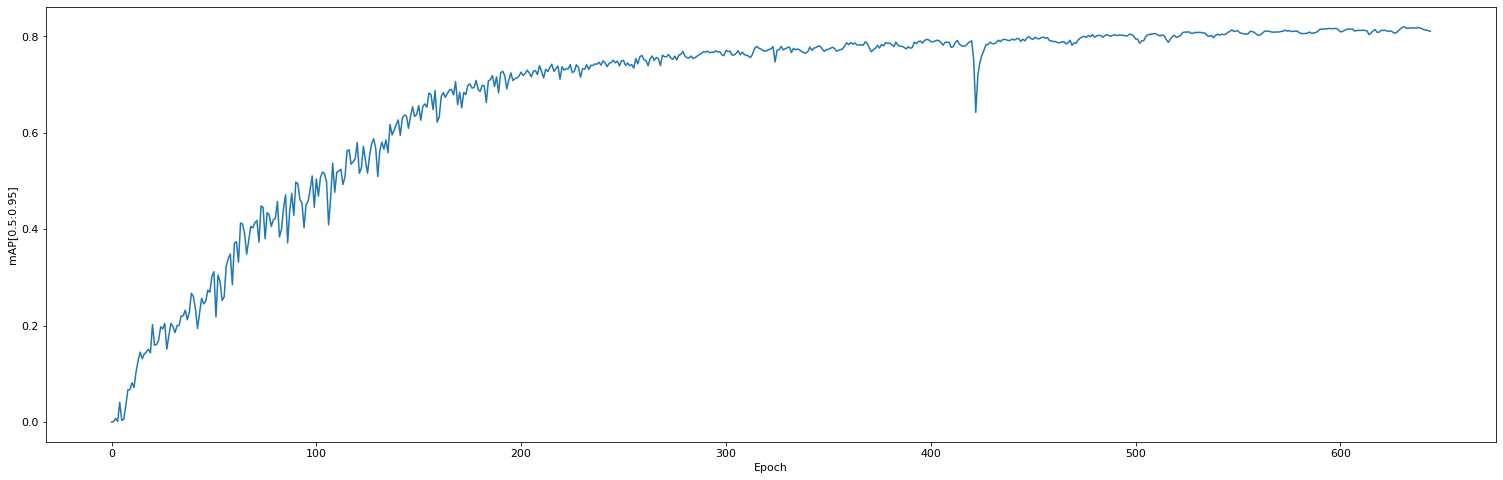

In [18]:
%cd Scaled-Yolov4

from pathlib import Path
from utils.general import *
import matplotlib.pyplot as plt
import time
import numpy as np

last_train_id = get_last_dir(Path('./runs') / 'exp', 'yolov4-csp-results')
print(last_train_id)
file = open(last_train_id + '/results.txt', "r")
ecpochs = []
ecpoch = 0
mAP_list = []
for line in file:
    ecpochs.append(ecpoch)
    ecpoch += 1
    mAP = float(line.split()[11])
    mAP_list.append(mAP)

print("Time:", time.ctime(time.time()), " -- Epoch:", ecpoch)
print("Min:", np.argmin(mAP_list[350:400]) + 350, mAP_list[np.argmin(mAP_list[350:400]) + 350])
# print("Min:", np.argmin(mAP_list[1400:1500]) + 1400, mAP_list[np.argmin(mAP_list[1400:1500]) + 1400])

fig=plt.figure(figsize=(26, 8))
plt.plot(ecpochs, mAP_list)
plt.xlabel('Epoch')
plt.ylabel('mAP[0.5:0.95]')
plt.show()

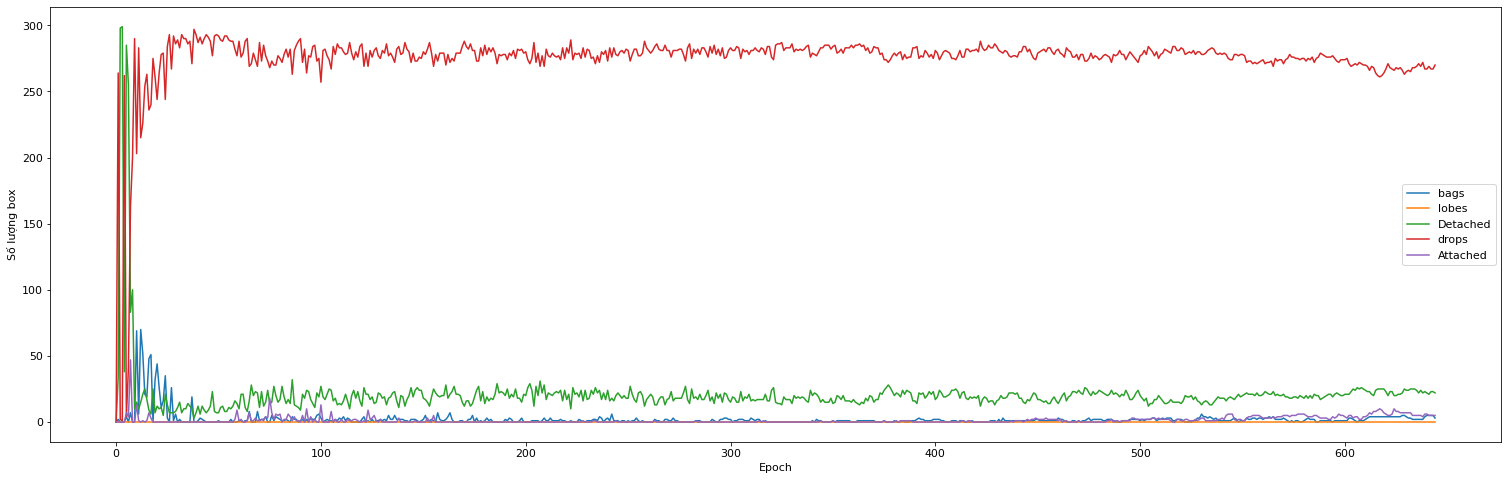

In [19]:
# 2 bags, 10 lobes, 73 Detached ligaments, 206 drops, 9 Attached ligaments,
list_label = ["bags", "lobes", "Detached", "drops", "Attached"]

bags = []
lobes= []
Detached= []
drops= []
Attached= []

for i in range(ecpoch):
    count_list = [0,0,0,0,0]
    count_file = open("./inference/"+ str(i) + "/f_01275.png.txt", "r").read()
    count_file = count_file.replace(", ", ",")
    count_file = count_file.split(",")
    for combo in count_file[:-1]:
        combo = combo.split(" ")
        count_list[list_label.index(combo[1])] += int(combo[0])
        
    bags.append(count_list[0])
    lobes.append(count_list[1])
    Detached.append(count_list[2])
    drops.append(count_list[3])
    Attached.append(count_list[4])

fig=plt.figure(figsize=(26, 8))
plt.plot(ecpochs, bags, label = "bags")
plt.plot(ecpochs, lobes, label = "lobes")
plt.plot(ecpochs, Detached, label = "Detached")
plt.plot(ecpochs, drops, label = "drops")
plt.plot(ecpochs, Attached, label = "Attached")
plt.xlabel('Epoch')
plt.ylabel('Số lượng box')
plt.legend()
plt.show()

[Errno 2] No such file or directory: 'Scaled-Yolov4'
/root/AFS/SangDV-ScaledYOLOv4/Scaled-Yolov4


---------------------- Epoch: 641 --------------------



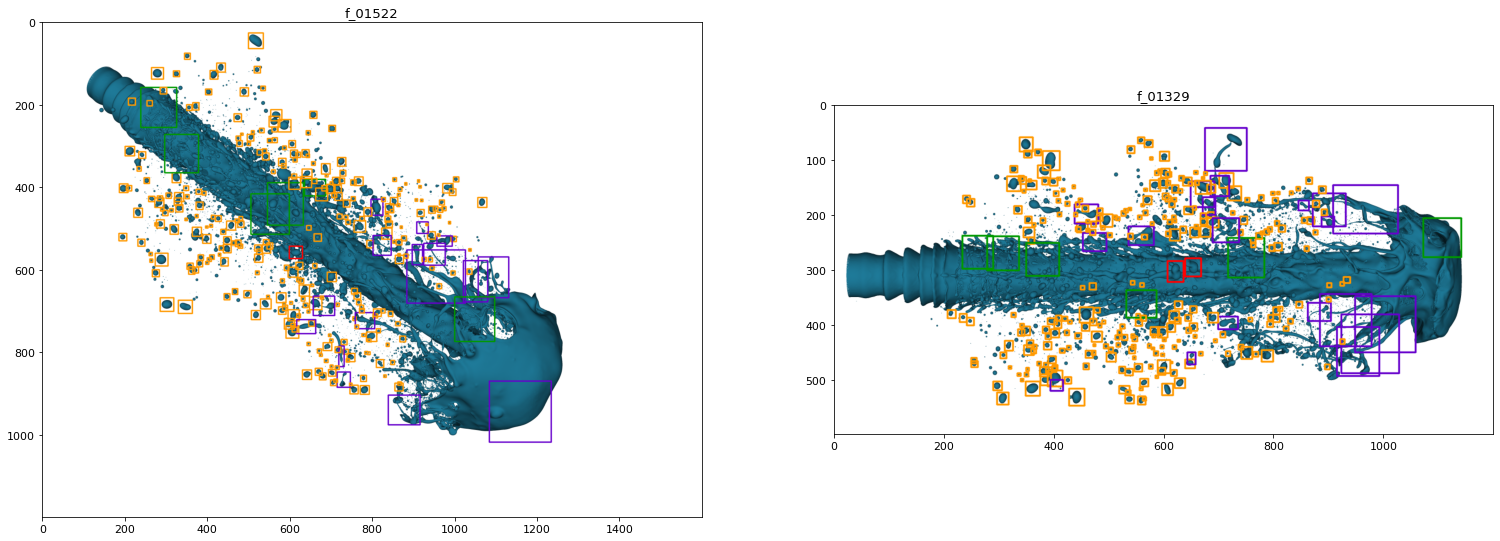

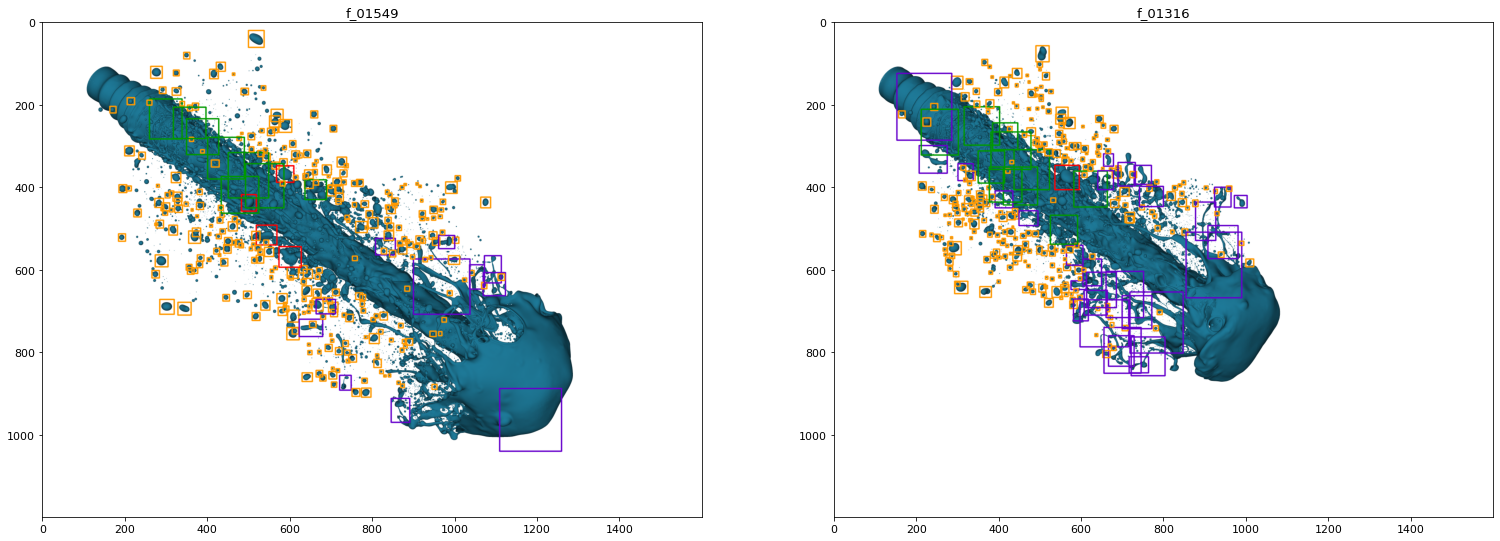



---------------------- Epoch: 642 --------------------



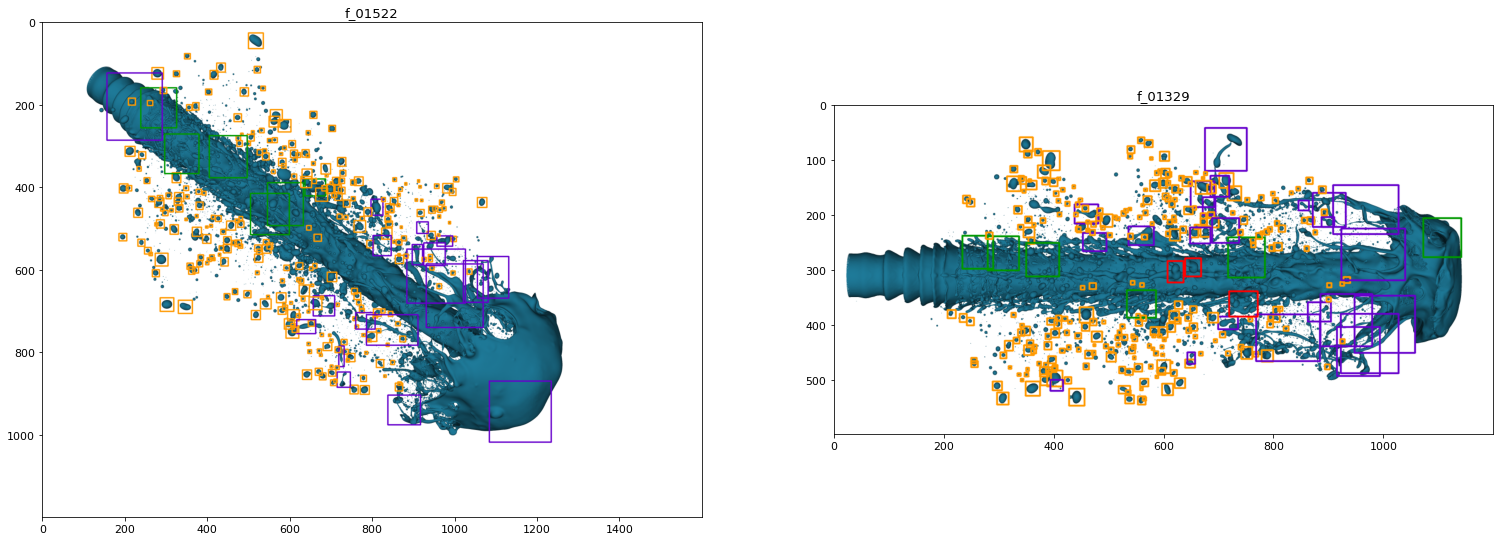

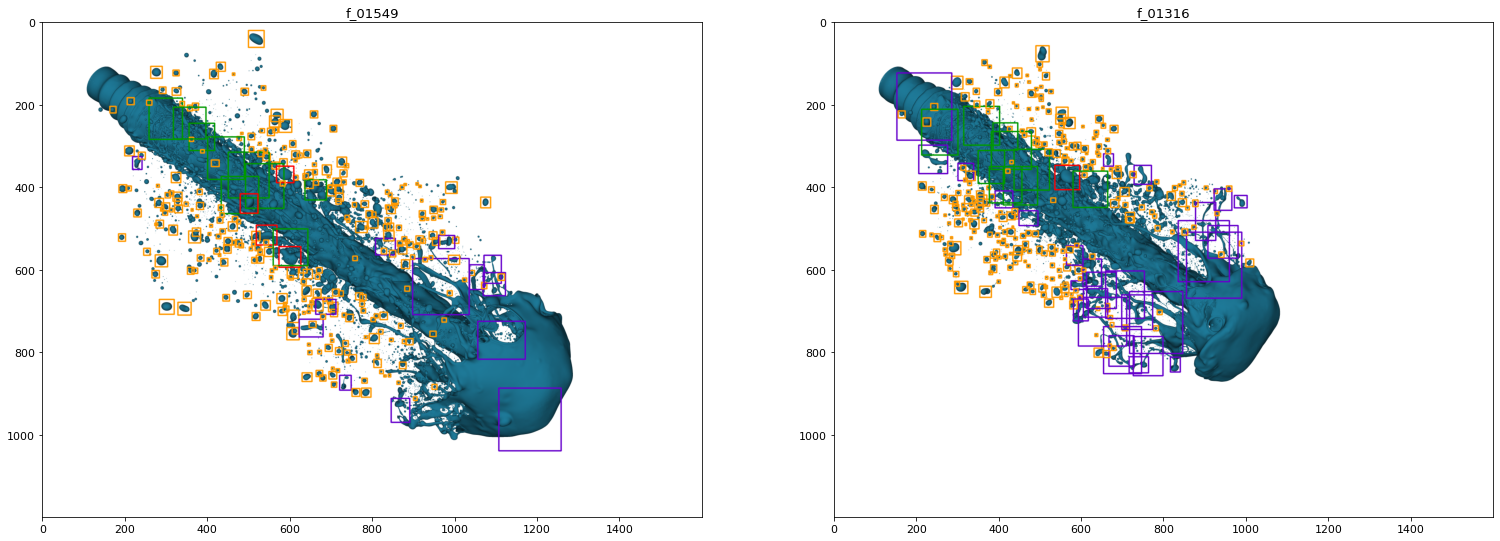



---------------------- Epoch: 643 --------------------



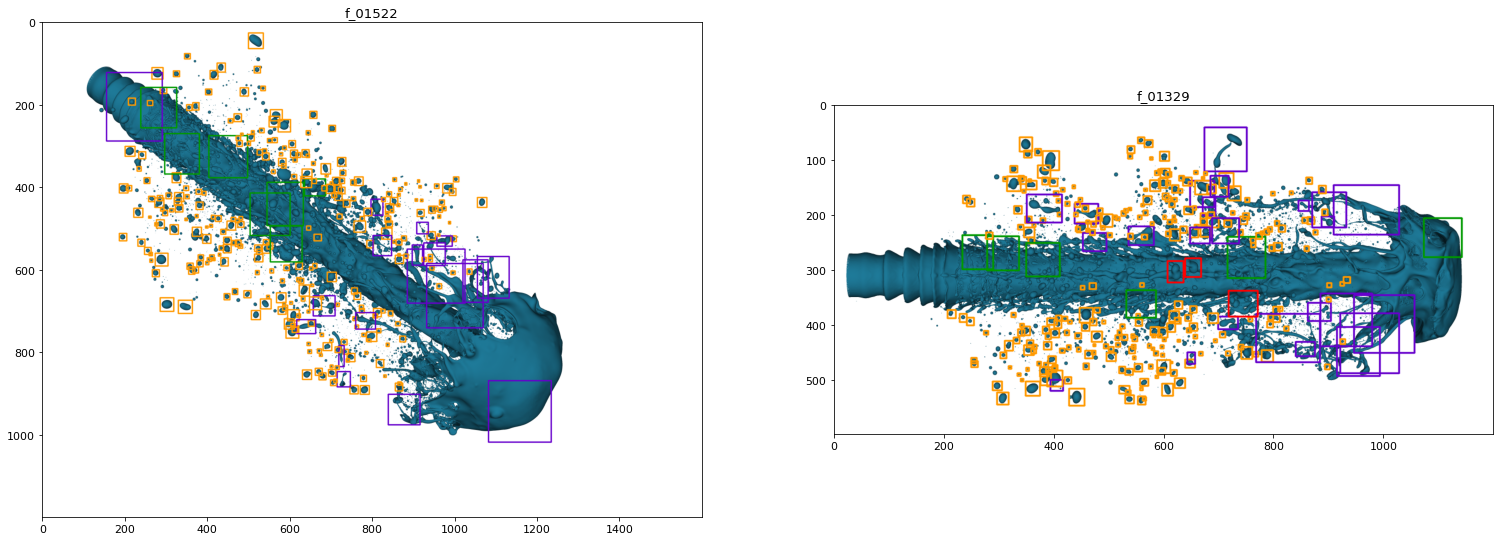

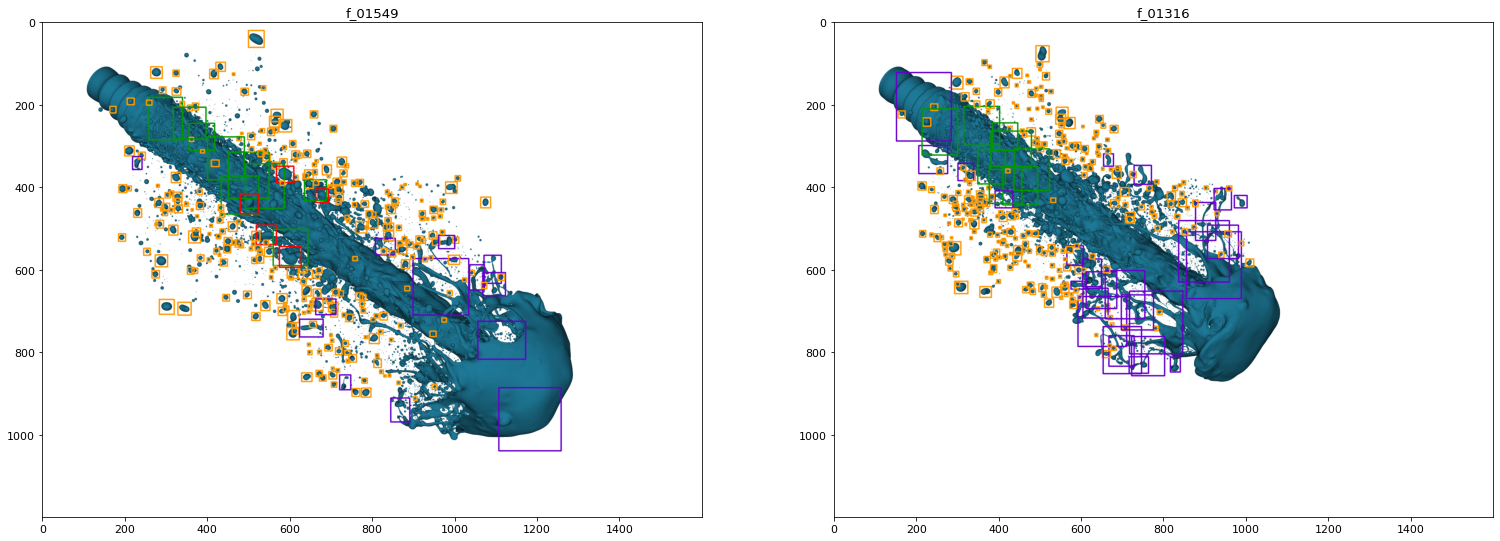



---------------------- Epoch: 644 --------------------



In [ ]:
%cd Scaled-Yolov4

import matplotlib.pyplot as plt
from PIL import Image

for i in range(ecpoch-4, ecpoch):
    print("")
    print("")
    print("---------------------- Epoch:", i, "--------------------")
    print("")
    fig=plt.figure(figsize=(26, 26))
    fig.add_subplot(1, 2, 1)
    plt.imshow(Image.open('./inference/'+str(i)+'/f_01522.png'))
    plt.title('f_01522')
    fig.add_subplot(1, 2, 2)
    plt.imshow(Image.open('./inference/'+str(i)+'/f_01329.png'))
    plt.title('f_01329')
    plt.show()
    
    fig=plt.figure(figsize=(26, 26))
    fig.add_subplot(1, 2, 1)
    plt.imshow(Image.open('./inference/'+str(i)+'/f_01549.png'))
    plt.title('f_01549')
    fig.add_subplot(1, 2, 2)
    plt.imshow(Image.open('./inference/'+str(i)+'/f_01316.png'))
    plt.title('f_01316')
    plt.show()